# **Machine Learning - Text Classification**

## Nama   : Nasywa Agiyan Nisa
## NIM    : 24050122130073
## Mentor : Rusnanda Farhan

# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) yang dibutuhkan.

In [ ]:
# ====== Manipulasi dan Analisis Data ======
import pandas as pd            # Untuk membaca dan memproses data tabular (seperti file CSV)
import numpy as np             # Untuk operasi numerik dan array multidimensi

# ====== Visualisasi Data ======
import matplotlib.pyplot as plt    # Untuk membuat berbagai jenis grafik visual
import seaborn as sns             # Untuk visualisasi statistik yang menarik dan informatif

# ====== Progres Bar ======
from tqdm import tqdm             # Untuk menampilkan progress bar saat melakukan loop besar (misalnya preprocessing data)

# ====== Text Preprocessing ======
import re                         # Untuk memproses dan memanipulasi teks menggunakan regex
import string                     # Untuk manipulasi karakter seperti tanda baca
import nltk                       # Library NLP untuk preprocessing teks
nltk.download('punkt')            # Unduh resource untuk tokenizer
nltk.download('stopwords')        # Unduh daftar stopwords (kata umum yang diabaikan)
nltk.download('punkt_tab')        # Tambahan resource tokenizer (opsional)

from nltk.tokenize import word_tokenize         # Untuk memecah teks menjadi kata-kata (token)
from nltk.corpus import stopwords               # Untuk mengakses stopwords

# ====== Scikit-learn (Machine Learning) ======
# ====== Manipulasi dan Analisis Data ======
import pandas as pd            # Untuk membaca dan memproses data tabular (seperti file CSV)
import numpy as np             # Untuk operasi numerik dan array multidimensi

# ====== Visualisasi Data ======
import matplotlib.pyplot as plt    # Untuk membuat berbagai jenis grafik visual
import seaborn as sns             # Untuk visualisasi statistik yang menarik dan informatif

# ====== Progres Bar ======
from tqdm import tqdm             # Untuk menampilkan progress bar saat melakukan loop besar (misalnya preprocessing data)

# ====== Text Preprocessing ======
import re                         # Untuk memproses dan memanipulasi teks menggunakan regex
import string                     # Untuk manipulasi karakter seperti tanda baca
import nltk                       # Library NLP untuk preprocessing teks
nltk.download('punkt')            # Unduh resource untuk tokenizer
nltk.download('stopwords')        # Unduh daftar stopwords (kata umum yang diabaikan)
#nltk.download('punkt_tab')        # Tambahan resource tokenizer (opsional)

from nltk.tokenize import word_tokenize         # Untuk memecah teks menjadi kata-kata (token)
from nltk.corpus import stopwords               # Untuk mengakses stopwords

# ====== Scikit-learn (Machine Learning) ======
from sklearn.model_selection import train_test_split           # Membagi dataset menjadi data latih dan uji
from sklearn.feature_extraction.text import TfidfVectorizer    # Mengubah teks menjadi vektor angka berbasis TF-IDF
from sklearn.ensemble import RandomForestClassifier            # Algoritma klasifikasi Random Forest
from sklearn.tree import DecisionTreeClassifier                # Algoritma klasifikasi Decision Tree
from sklearn.svm import SVC                                    # Algoritma klasifikasi SVC

from sklearn.metrics import accuracy_score, classification_report  # Evaluasi performa model

# ====== Evaluasi Model ======
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay                  # Untuk menghitung akurasi mode

from wordcloud import WordCloud



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# **2. Memuat Dataset**

In [ ]:
# Memuat dataset dari csv
df = pd.read_csv('/content/depression_dataset_reddit_cleaned.csv')

In [ ]:
# Melihat 5 baris awal df
df.head()

,clean_text,is_depression
0,we understand that most people who reply immed...,1
1,welcome to r depression s check in post a plac...,1
2,anyone else instead of sleeping more when depr...,1
3,i ve kind of stuffed around a lot in my life d...,1
4,sleep is my greatest and most comforting escap...,1


In [ ]:
# Melihat ringkasan dari df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7731 entries, 0 to 7730
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   clean_text     7731 non-null   object
 1   is_depression  7731 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 120.9+ KB


**Insights**

Dataset ini terdiri dari 2 kolom yaitu clean_text dan is_depression. Kolom clean_text memiliki tipe data object dan is_depression memiliki tipe data int_64. Dataset di atas memiliki 7731 data point tanpa missing values.

# **3. Data Cleaning**

### Missing Values

In [ ]:
# Melihat jumlah missing values
df.isnull().sum()

,0
clean_text,0
is_depression,0


**Insights:**

Di dalam dataset tidak terdapat missing values sehingga tidak diperlukan perbaikan atau penanganan missing values.

### Duplikasi Data

In [ ]:
# Melihat Duplikasi Data
df.duplicated().sum()

np.int64(81)

In [ ]:
# Menghapus duplikasi data
duplicate_rows = df[df.duplicated()]
print(duplicate_rows)

                                             clean_text  is_depression
259   hi i wa wondering if anyone ha this happen to ...              1
468   i want to be dead ive been suicidal for year i...              1
508   i want to be dead ive been suicidal for year i...              1
606   i want to be dead ive been suicidal for year i...              1
747   ha anyone been prescribed mirtazapine or other...              1
...                                                 ...            ...
7184  just been given ma marching order got ta go do...              0
7191  just been given ma marching order got ta go do...              0
7198                                     doing homework              0
7574  i m not liking that new itunes pricing at all ...              0
7577  cant eat drink or breath properly thanks to th...              0

[81 rows x 2 columns]


In [ ]:
# Menghapus duplikasi data
df = df.drop_duplicates(keep='first', inplace=False)

In [ ]:
# Melihat duplikasi data setelah di drop
df.duplicated().sum  ()

np.int64(0)

### **Insights:**

Di dalam dataset terdapat 81 duplikasi data sehingga diperlukan perbaikan atau penanganan duplikasi data dengan menghapus atau drop duplikasi data.

# **4. Text Processing**

### Case Folding

In [ ]:
# casefolding -> mengubah karakter huruf menjadi huruf kecil
df["clean_text"]=df["clean_text"].str.lower()
df.head()

<ipython-input-243-765b498f4a5e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["clean_text"]=df["clean_text"].str.lower()


,clean_text,is_depression
0,we understand that most people who reply immed...,1
1,welcome to r depression s check in post a plac...,1
2,anyone else instead of sleeping more when depr...,1
3,i ve kind of stuffed around a lot in my life d...,1
4,sleep is my greatest and most comforting escap...,1


### Menghapus Punctuation

In [ ]:
# Contoh load punctuation
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
# Fungsi untuk menghapus punctuation
def remove_punc(text):
  for punc in string.punctuation:
    text = text.replace(punc, " ")
  return text

In [ ]:
# Menjalankan fungsi remove_punc
df["clean_text"] = df["clean_text"].apply(lambda x: remove_punc(x))
df.head()

,clean_text,is_depression
0,we understand that most people who reply immed...,1
1,welcome to r depression s check in post a plac...,1
2,anyone else instead of sleeping more when depr...,1
3,i ve kind of stuffed around a lot in my life d...,1
4,sleep is my greatest and most comforting escap...,1


### Preprocess Text

In [ ]:
def preprocess_text(text):
    text = re.sub(r'\d+', '', text)  # Hapus angka
    text = text.strip()              # Hapus spasi
    words = text.split()             # Tokenisasi (split jadi list kata)
    return ' '.join(words)

df["clean_text"] = df["clean_text"].apply(preprocess_text)
df.head()

,clean_text,is_depression
0,we understand that most people who reply immed...,1
1,welcome to r depression s check in post a plac...,1
2,anyone else instead of sleeping more when depr...,1
3,i ve kind of stuffed around a lot in my life d...,1
4,sleep is my greatest and most comforting escap...,1


### Proporsi Label

In [ ]:
# Proses pelabelan
def label(is_depression):
    if is_depression == 1:
        return 'Depression'
    else:
        return 'Not Depression'

# Menerapkan pelabelan ke dataset
df['is_depression'] = df['is_depression'].apply(label)

# Mengecek distribusi label
df['is_depression'].value_counts()


,count
is_depression,
Not Depression,3889
Depression,3761


<Axes: xlabel='is_depression'>

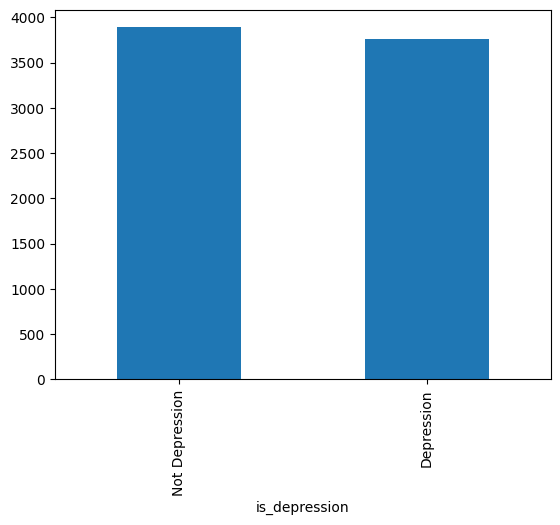

In [ ]:
#memunculkan proporsi label
df['is_depression'].value_counts().plot(kind='bar')

### Split Data

In [ ]:
X = df["clean_text"]
y = df["is_depression"]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Stopwords

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
  return " ".join([word for word in str(text).split() if word not in stop_words])


X_train = X_train.apply(remove_stopwords)
X_test = X_test.apply(remove_stopwords)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Stemming

In [ ]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

def stem_and_lemmatize_text(text):
  words = text.split()
  stemmed_words = [stemmer.stem(word) for word in words]
  lemmatized_words = [lemmatizer.lemmatize(word) for word in stemmed_words]
  return " ".join(lemmatized_words)


X_train = X_train.apply(stem_and_lemmatize_text)
X_test = X_test.apply(stem_and_lemmatize_text)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [ ]:
df.head(10)

,clean_text,is_depression
0,we understand that most people who reply immed...,Depression
1,welcome to r depression s check in post a plac...,Depression
2,anyone else instead of sleeping more when depr...,Depression
3,i ve kind of stuffed around a lot in my life d...,Depression
4,sleep is my greatest and most comforting escap...,Depression
5,i m year old turning soon in a few month i liv...,Depression
6,i live alone and despite me being prone to lon...,Depression
7,i m not looking for sympathy just simply to st...,Depression
8,i don t know how to communicate all of my thou...,Depression
9,mom i m sad it hurt in my heart the feeling fa...,Depression


### Word Count

In [ ]:
from collections import Counter

# Assuming X_train is a pandas Series or list of strings
def count_unique_words(X_train):
  """Counts the total number of unique words in X_train."""
  all_words = []
  for text in X_train:
    words = text.lower().split()
    all_words.extend(words)
  word_counts = Counter(all_words)
  return len(word_counts)


unique_word_count = count_unique_words(X_train)
print("Total unique words in X_train:", unique_word_count)

Total unique words in X_train: 13130


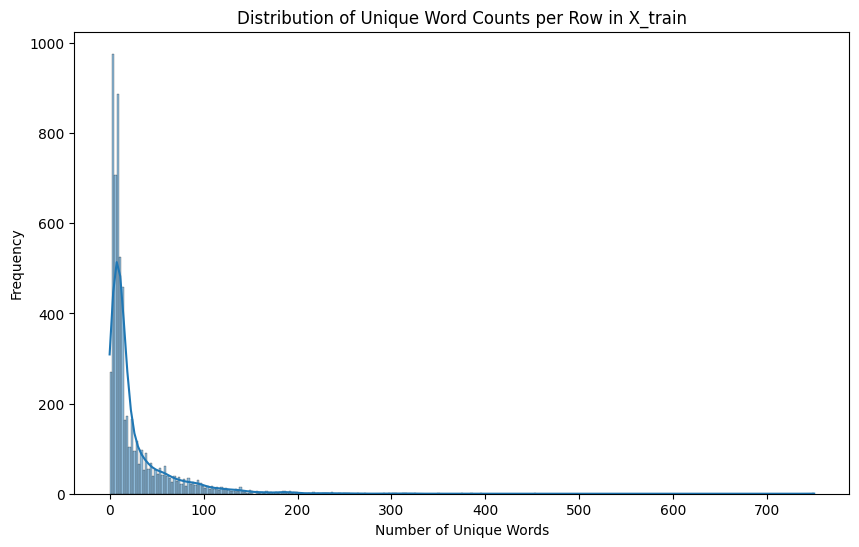

In [ ]:
# Assuming X_train is a pandas Series
unique_word_counts = X_train.apply(lambda x: len(set(x.split())))

# Create a distribution plot using seaborn
plt.figure(figsize=(10, 6))
sns.histplot(unique_word_counts, kde=True)
plt.title('Distribution of Unique Word Counts per Row in X_train')
plt.xlabel('Number of Unique Words')
plt.ylabel('Frequency')
plt.show()

### WordCloud

#### X Train

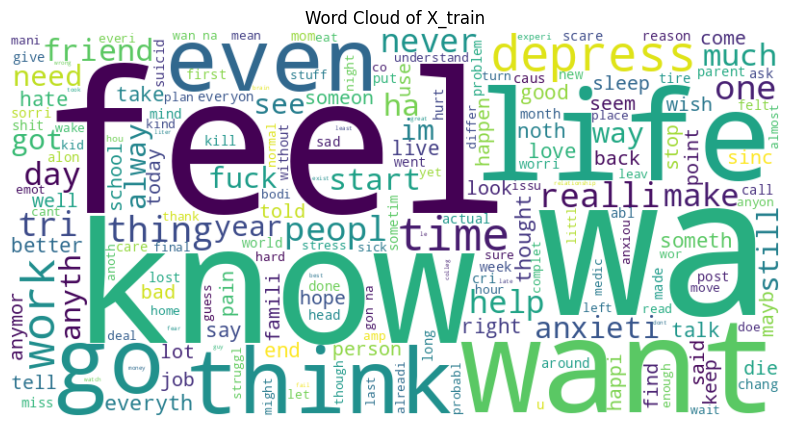

In [ ]:
# Assuming X_train is a pandas Series
all_text = ' '.join(X_train)

# Generate the word cloud
wordcloud = WordCloud(width=800,
                      height=400,
                      background_color='white').generate(all_text)

# Display the generated image:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Word Cloud of X_train')
plt.show()

### Y Train

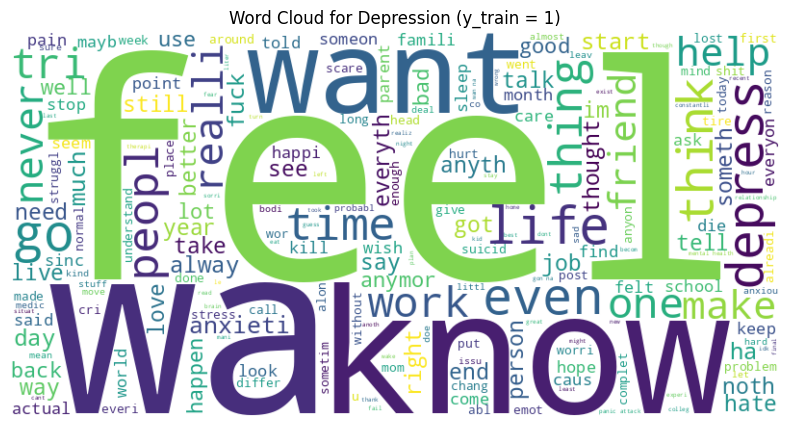

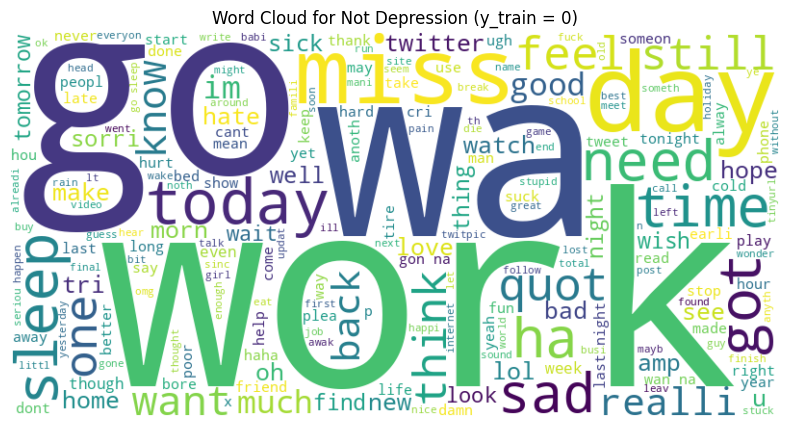

In [ ]:
# Pisahkan data X_train berdasarkan nilai y_train
depression_text = ' '.join(X_train[y_train == 'Depression'])  # Teks untuk depresi (y_train = 'Depression')
not_depression_text = ' '.join(X_train[y_train == 'Not Depression'])  # Teks untuk non-depresi (y_train = 'Not Depression')

# Buat wordcloud untuk depresi
wordcloud_depression = WordCloud(width=800, height=400, background_color='white').generate(depression_text)

# Buat wordcloud untuk non-depresi
wordcloud_not_depression = WordCloud(width=800, height=400, background_color='white').generate(not_depression_text)

# Tampilkan wordcloud depresi
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_depression, interpolation='bilinear')
plt.axis("off")
plt.title('Word Cloud for Depression (y_train = 1)')
plt.show()

# Tampilkan wordcloud non-depresi
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_not_depression, interpolation='bilinear')
plt.axis("off")
plt.title('Word Cloud for Not Depression (y_train = 0)')
plt.show()

# **5.  Feature Extraction**

In [ ]:
vectorizer = TfidfVectorizer(
    stop_words='english',
    ngram_range=(1,3),
    max_features=50000
)
vectorizer.fit(X_train)
X_train_vectorized = vectorizer.transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

In [ ]:
print(X_train_vectorized)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 237844 stored elements and shape (6120, 50000)>
  Coords	Values
  (0, 25281)	0.37691640160359124
  (0, 32841)	0.5245089744663729
  (0, 38108)	0.47960699334181284
  (0, 38688)	0.23331215683007883
  (0, 46222)	0.5462297422507832
  (1, 326)	0.1233141261734596
  (1, 332)	0.21410555983871507
  (1, 333)	0.21410555983871507
  (1, 1646)	0.1361899846029978
  (1, 1903)	0.1650434547288025
  (1, 20361)	0.13382573197727024
  (1, 20503)	0.23191467366691426
  (1, 20504)	0.23191467366691426
  (1, 20528)	0.12369197298605976
  (1, 20630)	0.23191467366691426
  (1, 20631)	0.23191467366691426
  (1, 27173)	0.09471497800596772
  (1, 27260)	0.18014552816360038
  (1, 29667)	0.13745903860281675
  (1, 30258)	0.1838222353403494
  (1, 30259)	0.19629644601051588
  (1, 33875)	0.14870291889798135
  (1, 35034)	0.11221785316461073
  (1, 35075)	0.2214970099063431
  (1, 37124)	0.1660131215121502
  :	:
  (6117, 48055)	0.08318491847902054
  (6117, 48080)	0.09097

# **6. Modelling and Evaluation**

## **Desicion Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train_vectorized, y_train)

DecisionTreeClassifier()

In [ ]:
train_acc = accuracy_score(y_train, dt_model.predict(X_train_vectorized))
test_acc = accuracy_score(y_test, dt_model.predict(X_test_vectorized))

print(f"Train Accuracy: {train_acc:.4f}") # Menampilkan akurasi data latih
print(f"Test Accuracy:  {test_acc:.4f}") # Menampilkan akurasi data uji

y_pred = dt_model.predict(X_test_vectorized) # Menggunakan X_test_vectorized untuk prediksi

print("\nLaporan Klasifikasi (Data Uji):")

print(classification_report(y_test, y_pred))

Train Accuracy: 0.9989
Test Accuracy:  0.9261

Laporan Klasifikasi (Data Uji):
                precision    recall  f1-score   support

    Depression       0.94      0.91      0.92       759
Not Depression       0.91      0.94      0.93       771

      accuracy                           0.93      1530
     macro avg       0.93      0.93      0.93      1530
  weighted avg       0.93      0.93      0.93      1530



## **Random Forest**

In [ ]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train_vectorized, y_train)


RandomForestClassifier()

In [ ]:
train_acc = accuracy_score(y_train, rf_model.predict(X_train_vectorized))
test_acc = accuracy_score(y_test, rf_model.predict(X_test_vectorized))

print(f"Train Accuracy: {train_acc:.4f}") # Menampilkan akurasi data latih
print(f"Test Accuracy:  {test_acc:.4f}") # Menampilkan akurasi data uji

y_pred = rf_model.predict(X_test_vectorized) # Menggunakan X_test_vectorized untuk prediksi

print("\nLaporan Klasifikasi (Data Uji):")

print(classification_report(y_test, y_pred))

Train Accuracy: 0.9989
Test Accuracy:  0.9562

Laporan Klasifikasi (Data Uji):
                precision    recall  f1-score   support

    Depression       0.99      0.92      0.95       759
Not Depression       0.93      0.99      0.96       771

      accuracy                           0.96      1530
     macro avg       0.96      0.96      0.96      1530
  weighted avg       0.96      0.96      0.96      1530



## **SVM**

In [ ]:
from sklearn.svm import SVC
svm_model = SVC()
svm_model.fit(X_train_vectorized, y_train)

SVC()

In [ ]:
train_acc = accuracy_score(y_train, svm_model.predict(X_train_vectorized))
test_acc = accuracy_score(y_test, svm_model.predict(X_test_vectorized))

print(f"Train Accuracy: {train_acc:.4f}") # Menampilkan akurasi data latih
print(f"Test Accuracy:  {test_acc:.4f}") # Menampilkan akurasi data uji

y_pred = svm_model.predict(X_test_vectorized) # Menggunakan X_test_vectorized untuk prediksi

print("\nLaporan Klasifikasi (Data Uji):")
print(classification_report(y_test, y_pred))

Train Accuracy: 0.9977
Test Accuracy:  0.9608

Laporan Klasifikasi (Data Uji):
                precision    recall  f1-score   support

    Depression       0.97      0.96      0.96       759
Not Depression       0.96      0.97      0.96       771

      accuracy                           0.96      1530
     macro avg       0.96      0.96      0.96      1530
  weighted avg       0.96      0.96      0.96      1530



## **Matrix Confusion**


### **Desicion Tree**

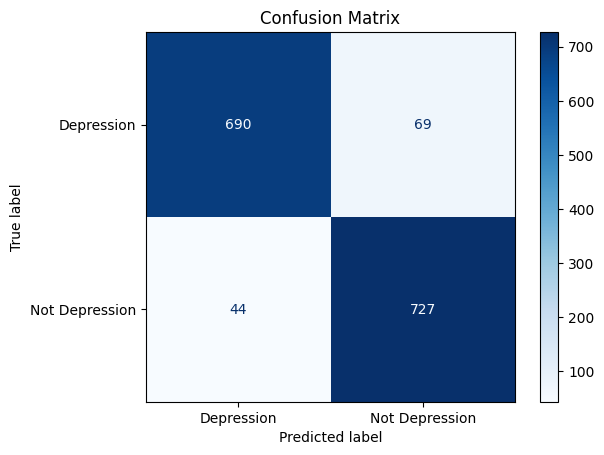

In [ ]:
y_pred = dt_model.predict(X_test_vectorized)

cm = confusion_matrix(y_test, y_pred, labels=dt_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dt_model.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()


### **Random Forest**

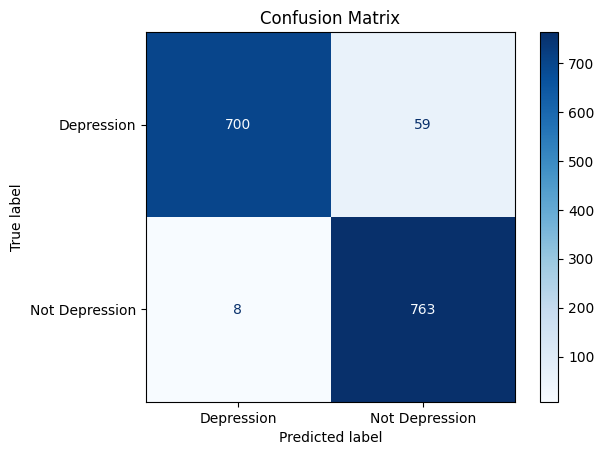

In [ ]:
y_pred = rf_model.predict(X_test_vectorized)

cm = confusion_matrix(y_test, y_pred, labels=rf_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_model.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()


### **SVM**

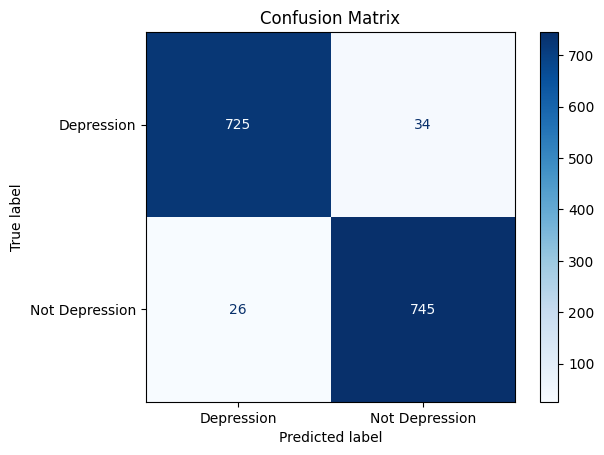

In [ ]:
y_pred = svm_model.predict(X_test_vectorized)

cm = confusion_matrix(y_test, y_pred, labels=svm_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svm_model.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()


# **7. Kesimpulan**

Ketiga model yang diuji menunjukkan performa klasifikasi teks yang sangat baik berdasarkan nilai Train Accuracy dan Test Accuracy. Namun, terdapat beberapa perbedaan dalam kemampuan generalisasi masing-masing model:

1. **Support Vector Machine (SVM)**  
   - **Train Accuracy**: 99.77%  
   - **Test Accuracy**: 96.08%  
   SVM memberikan hasil terbaik dalam hal generalisasi, dengan Test Accuracy tertinggi di antara ketiga model. Selisih kecil antara Train dan Test Accuracy menunjukkan kestabilan dan keandalan model ini dalam mengklasifikasikan data teks yang belum terlihat sebelumnya. SVM juga dikenal sangat efektif dalam menangani data berdimensi tinggi seperti teks.

2. **Random Forest**  
   - **Train Accuracy**: 99.89%  
   - **Test Accuracy**: 95.62%  
   Random Forest juga menunjukkan performa yang sangat baik dan seimbang. Meskipun Test Accuracy-nya sedikit di bawah SVM, model ini tetap kompetitif berkat kemampuannya mengurangi variansi dan menangkap pola kompleks dalam data. Ini menjadikannya pilihan yang kuat, terutama jika stabilitas model menjadi prioritas.

3. **Decision Tree**  
   - **Train Accuracy**: 99.89%  
   - **Test Accuracy**: 92.61%  
   Decision Tree memiliki akurasi pelatihan yang tinggi, namun selisih cukup besar dengan Test Accuracy mengindikasikan adanya potensi overfitting. Meskipun demikian, model ini masih mampu memberikan hasil klasifikasi yang baik, dan bisa menjadi pilihan jika dibutuhkan model yang lebih mudah diinterpretasikan.

Secara keseluruhan, SVM tampil sebagai model dengan performa generalisasi terbaik, diikuti oleh Random Forest yang juga sangat kompetitif. Decision Tree, meskipun sedikit tertinggal, tetap layak dipertimbangkan tergantung pada konteks dan kebutuhan interpretabilitas.


# **8. Inferency**

In [ ]:
# Contoh penggunaan model SVM untuk inferensi (prediksi)
new_text = ["The weather is sunny today, and I feel great!"]

# Praproses teks baru
new_text_processed = pd.Series(new_text)
new_text_processed = new_text_processed.str.lower()
new_text_processed = new_text_processed.apply(lambda x: remove_punc(x))
new_text_processed = new_text_processed.apply(preprocess_text)
new_text_processed = new_text_processed.apply(remove_stopwords)
new_text_processed = new_text_processed.apply(stem_and_lemmatize_text)

# Vektorisasi teks baru
new_text_vectorized = vectorizer.transform(new_text_processed)

# Prediksi menggunakan model SVM
prediction = svm_model.predict(new_text_vectorized)

# Hasil prediksi
print(f"Teks: {new_text}")
print(f"Prediksi: {prediction}")

# Contoh interpretasi hasil
if prediction[0] == 1:
  print("Model memprediksi teks tersebut menunjukkan gejala depresi.")
else:
  print("Model memprediksi teks tersebut tidak menunjukkan gejala depresi.")


Teks: ['The weather is sunny today, and I feel great!']
Prediksi: ['Not Depression']
Model memprediksi teks tersebut tidak menunjukkan gejala depresi.
